In [ ]:
from google.colab import files
file=files.upload()

Saving creditcard.csv (1).zip to creditcard.csv (1).zip


**-------------------- Importing Required Libraries ---------------------**



In [ ]:
# Handing Arrays
import numpy as np

# Handing Dataframe
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing for ML
from sklearn.preprocessing import LabelEncoder,RobustScaler

# Data spliting & Cross Validation for resampling to remove data imbalancing
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score,cross_val_predict

# SMOTE for resampling
from imblearn.over_sampling import SMOTE

# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Model Evaluation
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report

# Pipeline
from sklearn.pipeline import Pipeline

# Handel Warnings
import warnings
warnings.filterwarnings('ignore')

**-------------------- Data Handling --------------------**

In [ ]:
# Reading data
credit_c=pd.read_csv("creditcard.csv (1).zip",compression='zip')  # using compression='zip', cause it was in zip format

# Data Copy
credit=credit_c.copy() # Taking a copy of data for further use

# Data
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Checking data info
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# Checking Null Values
credit.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
# Statistical Description of data
credit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


0    284315
1       492
Name: Class, dtype: int64




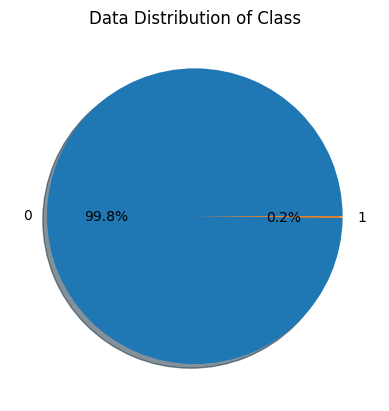

In [ ]:
# Data Distribution of target variable
print(credit['Class'].value_counts())
print("\n")

# Pie plot of it
cnt=credit['Class'].value_counts()
lbl=cnt.index
plt.title("Data Distribution of Class")
plt.pie(cnt,labels=lbl,autopct="%.1f%%",shadow=True)
plt.show()

**-------------------- Data Preprocessing --------------------**

- **Scaling** is used to normalize the data. It will put the values of different features in same scale by keeping their mean & standard deviation in common scale.
- If we don't perform scaling before going for model building then the model will get biased to the feature that having higher magnitude values.
- Here i've used **Robust Scaler** cause it is less sensitive to outliers than other Scaler methods.

In [ ]:
# Selecting feature & traget variable
x=credit.drop("Class",axis=1) # Feature variable
y=credit['Class']  # Target variable

# Data Scaling
scl=pd.DataFrame(RobustScaler().fit_transform(x.to_numpy()),columns=x.columns)

# Scaled Data
scl_df=scl.join(y)
scl_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-0.616237,-0.098602,1.228905,0.878152,-0.217859,0.631245,0.177406,0.142432,0.334787,...,0.026866,0.253109,-0.320791,0.032681,0.167619,-0.241182,0.816731,-0.246091,1.783274,0
1,-0.994983,0.524929,0.143100,-0.006970,0.293974,0.087726,0.164395,-0.105740,0.117064,-0.164482,...,-0.473332,-0.602719,0.363442,-0.479557,0.225462,0.313475,-0.063781,0.026519,-0.269825,0
2,-0.994972,-0.615587,-1.002407,0.830932,0.251024,-0.344345,1.778007,0.668164,0.420388,-1.179796,...,0.668917,0.714254,2.974603,-0.919589,-0.515430,-0.153111,-0.350218,-0.540962,4.983721,0
3,-0.994972,-0.440239,-0.178789,0.841250,-0.529808,0.033775,1.303832,0.175637,0.662489,-1.076888,...,-0.190105,-0.001408,-0.578786,-1.531963,0.944482,-0.298959,0.379163,0.382611,1.418291,0
4,-0.994960,-0.526089,0.579239,0.713861,0.265632,-0.270695,0.317183,0.491625,-0.546463,0.700808,...,0.048266,0.739092,-0.407980,0.126293,-0.333308,0.976221,1.347133,1.553716,0.670579,0


In [ ]:
# Selecting feature & traget variable after scaling
x=scl_df.drop("Class",axis=1) # Feature variable
y=scl_df['Class']  # Target variable

# Data Spliting for training & testing
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=42)

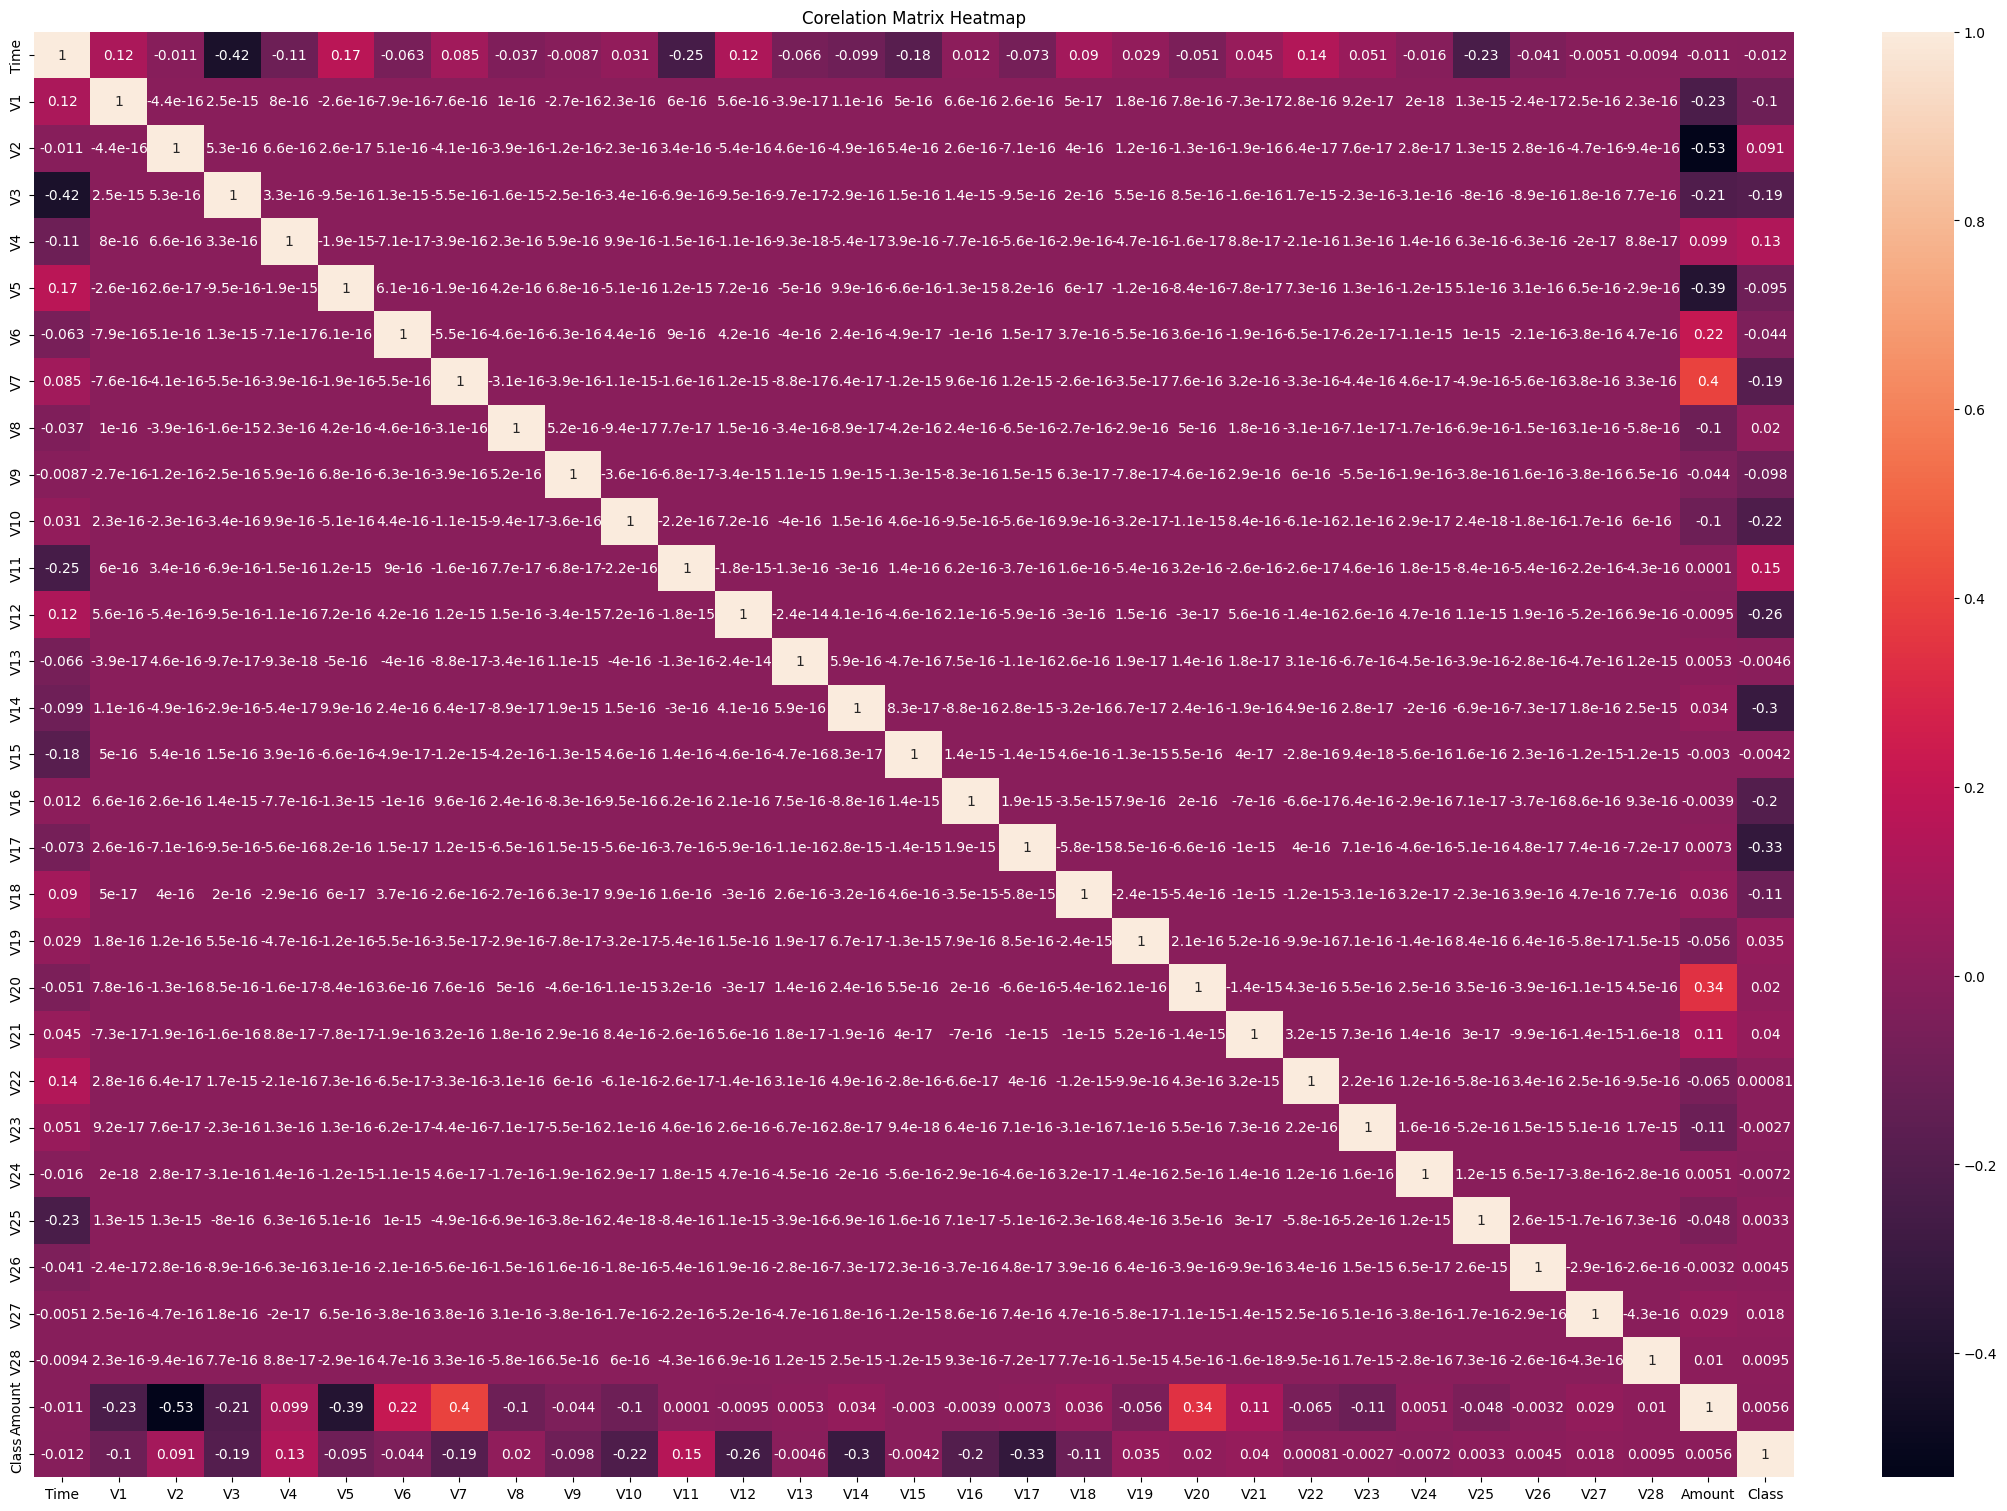

In [ ]:
# Corelation matrix heatmap
cor=scl_df.corr() # calculating corelation
plt.figure(figsize=(20,15),layout='constrained')
plt.title("Corelation Matrix Heatmap")
sns.heatmap(cor,annot=True)
plt.show()

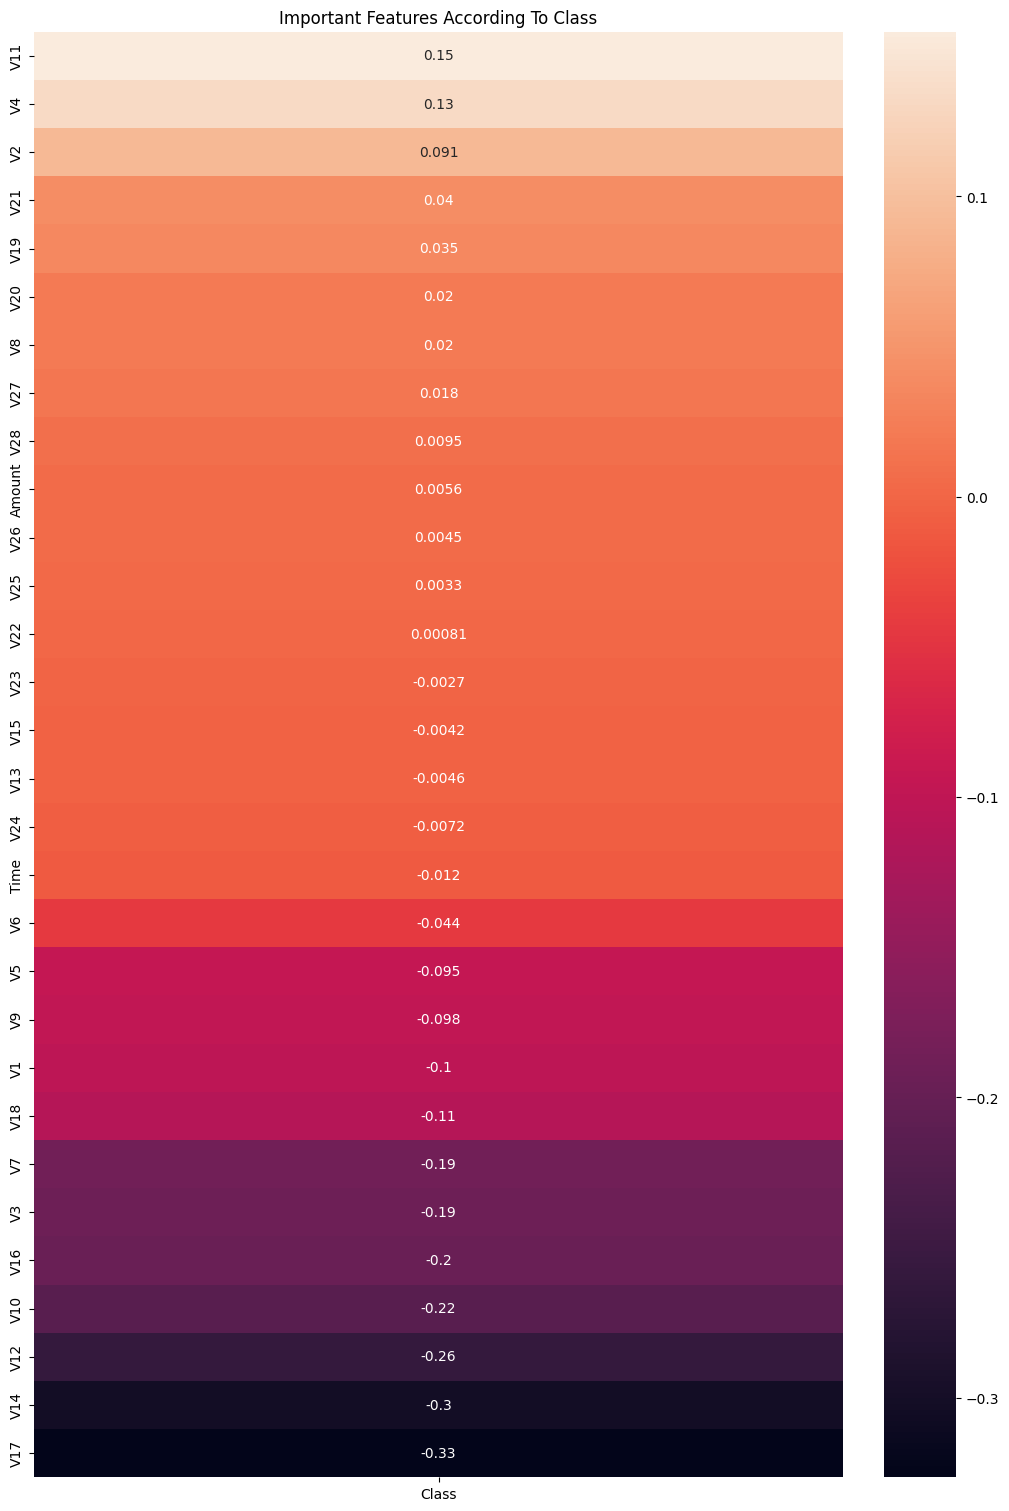

In [ ]:
# Feture importance compared to Class
cor=scl_df.corr()
target=cor['Class'].drop('Class')
target_s=target.sort_values(ascending=False)
plt.figure(figsize=(10,15),layout='constrained')
plt.title('Important Features According To Class')
sns.heatmap(target_s.to_frame(),annot=True)
plt.show()

**-------------------- ML Model Building --------------------**

In [ ]:
# Logistic Regression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

# Evaluation Metrics to evaluate the model
acc_lr=accuracy_score(y_test,y_pred)  # Calculate the accuracy of the model
prc_lr=precision_score(y_test,y_pred) # Calculate the precision of the model
rec_lr=recall_score(y_test,y_pred)    # Calculate the recall of the model
f1_lr=f1_score(y_test,y_pred)         # Calculate the f1 score of the model. It is simmilar to accuracy but it can deals with the data imbalancing present in the model & will return us the harmonic mean of precision & recall.
conf_lr=confusion_matrix(y_test,y_pred)
clf_lr=classification_report(y_test,y_pred)

print("Logistic Regression Model Evaluation")
print("\n")
print("Accuracy Score: ",acc_lr)
print("Precission Score: ",prc_lr)
print("Recall Score: ",rec_lr)
print("F1 Score: ",f1_lr)
print("\n")
print("Confusion Matrix:\n",conf_lr)
print("\n")
print("Classification Report:\n",clf_lr)

Logistic Regression Model Evaluation


Accuracy Score:  0.9992743700478681
Precission Score:  0.8775510204081632
Recall Score:  0.6323529411764706
F1 Score:  0.7350427350427351


Confusion Matrix:
 [[85295    12]
 [   50    86]]


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.88      0.63      0.74       136

    accuracy                           1.00     85443
   macro avg       0.94      0.82      0.87     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
# Decsion Tree
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

# Evaluation Metrics to evaluate the model
acc_dt=accuracy_score(y_test,y_pred)  # Calculate the accuracy of the model
prc_dt=precision_score(y_test,y_pred) # Calculate the precision of the model
rec_dt=recall_score(y_test,y_pred)    # Calculate the recall of the model
f1_dt=f1_score(y_test,y_pred)         # Calculate the f1 score of the model. It is simmilar to accuracy but it can deals with the data imbalancing present in the model & will return us the harmonic mean of precision & recall.
conf_dt=confusion_matrix(y_test,y_pred)
clf_dt=classification_report(y_test,y_pred)

print("Decsison Tree Model Evaluation")
print("\n")
print("Accuracy Score: ",acc_dt)
print("Precission Score: ",prc_dt)
print("Recall Score: ",rec_dt)
print("F1 Score: ",f1_dt)
print("\n")
print("Confusion Matrix:\n",conf_dt)
print("\n")
print("Classification Report:\n",clf_dt)

Decsison Tree Model Evaluation


Accuracy Score:  0.9990402958697612
Precission Score:  0.6666666666666666
Recall Score:  0.7941176470588235
F1 Score:  0.7248322147651006


Confusion Matrix:
 [[85253    54]
 [   28   108]]


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.67      0.79      0.72       136

    accuracy                           1.00     85443
   macro avg       0.83      0.90      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
# Random Forest
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

# Evaluation Metrics to evaluate the model
acc_rf=accuracy_score(y_test,y_pred)  # Calculate the accuracy of the model
prc_rf=precision_score(y_test,y_pred) # Calculate the precision of the model
rec_rf=recall_score(y_test,y_pred)    # Calculate the recall of the model
f1_rf=f1_score(y_test,y_pred)         # Calculate the f1 score of the model. It is simmilar to accuracy but it can deals with the data imbalancing present in the model & will return us the harmonic mean of precision & recall.
conf_rf=confusion_matrix(y_test,y_pred)
clf_rf=classification_report(y_test,y_pred)

print("Random Forest Model Evaluation")
print("\n")
print("Accuracy Score: ",acc_rf)
print("Precission Score: ",prc_rf)
print("Recall Score: ",rec_rf)
print("F1 Score: ",f1_rf)
print("\n")
print("Confusion Matrix:\n",conf_rf)
print("\n")
print("Classification Report:\n",clf_rf)

Random Forest Model Evaluation


Accuracy Score:  0.9996254813150287
Precission Score:  0.940677966101695
Recall Score:  0.8161764705882353
F1 Score:  0.8740157480314961


Confusion Matrix:
 [[85300     7]
 [   25   111]]


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.94      0.82      0.87       136

    accuracy                           1.00     85443
   macro avg       0.97      0.91      0.94     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
# XG-Boost
xg=XGBClassifier()
xg.fit(x_train,y_train)
y_pred=xg.predict(x_test)

# Evaluation Metrics to evaluate the model
acc_xg=accuracy_score(y_test,y_pred)  # Calculate the accuracy of the model
prc_xg=precision_score(y_test,y_pred) # Calculate the precision of the model
rec_xg=recall_score(y_test,y_pred)    # Calculate the recall of the model
f1_xg=f1_score(y_test,y_pred)         # Calculate the f1 score of the model. It is simmilar to accuracy but it can deals with the data imbalancing present in the model & will return us the harmonic mean of precision & recall.
conf_xg=confusion_matrix(y_test,y_pred)
clf_xg=classification_report(y_test,y_pred)

print("XG-Boost Model Evaluation")
print("\n")
print("Accuracy Score: ",acc_xg)
print("Precission Score: ",prc_xg)
print("Recall Score: ",rec_xg)
print("F1 Score: ",f1_xg)
print("\n")
print("Confusion Matrix:\n",conf_xg)
print("\n")
print("Classification Report:\n",clf_xg)

XG-Boost Model Evaluation


Accuracy Score:  0.9996137776061234
Precission Score:  0.9327731092436975
Recall Score:  0.8161764705882353
F1 Score:  0.8705882352941177


Confusion Matrix:
 [[85299     8]
 [   25   111]]


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.93      0.82      0.87       136

    accuracy                           1.00     85443
   macro avg       0.97      0.91      0.94     85443
weighted avg       1.00      1.00      1.00     85443



**-------------------- ML Model Evaluation --------------------**

In [ ]:
# MOdel Evaluation Tabular Format
tbl=pd.DataFrame()
tbl['Model']=['Logistic Regression','Decision Tree','Random Forest','X Gradient Boosting']
tbl['Accuracy']=[acc_lr,acc_dt,acc_rf,acc_xg]
tbl['F1 Score']=[f1_lr,f1_dt,f1_rf,f1_xg]

tbl.sort_values('F1 Score',ascending=False,ignore_index=True)

,Model,Accuracy,F1 Score
0,Random Forest,0.999625,0.874016
1,X Gradient Boosting,0.999614,0.870588
2,Logistic Regression,0.999274,0.735043
3,Decision Tree,0.999040,0.724832


**-------------------- Resampling Techniques --------------------**

- **Cross validation** technique is a resampling technique that is used to split the data properly for the model building. It can delas with the bias variance tradeoff present in the data to avoid overfitting
- Here I've used **Stratified K Fold** Cross validation technique.
- It will split the whole data into K number of folds & in each fold it will consider approximately simmilar percentage of target class. After that the model consider 1st fold as a testing data & the model gets trained with k-1 folds of data. After the 1st execution it will consider 2nd fold as a testing data & the model gets trained with k-1 folds of data. This process will continue untill the last fold get executed.

In [ ]:
# Applying Cross Validation Technique - Accuracy calculation
lr=LogisticRegression()
dt=DecisionTreeClassifier(random_state=10)
rf=RandomForestClassifier(random_state=10)
xg=XGBClassifier(random_state=10)

result=[]

m=[lr,dt,rf,xg]
model_name=['Logistic Regression','Decision Tree','Random Forest','X Gradient Boosting']

def mdl(model):
  print("\n")
  print(i)

  pipe=Pipeline([('model',model)])
  pipe.fit(x_train,y_train)
  cv=StratifiedKFold(n_splits=5)   # taking 5 folds
  score=cross_val_score(pipe,x_train,y_train,cv=cv,scoring='accuracy',n_jobs=-1)
  result.append(score)
  y_pred=cross_val_predict(model,x_train,y_train,cv=cv)
  acc=accuracy_score(y_train,y_pred)
  print('Training Accuracy: ',np.mean(score))
  print('Testing Accuracy: ',acc)

for i in m:
  mdl(i)



LogisticRegression()
Training Accuracy:  0.9991723687595757
Testing Accuracy:  0.9991723681306555


DecisionTreeClassifier(random_state=10)
Training Accuracy:  0.9990570012136043
Testing Accuracy:  0.9990570012640195


RandomForestClassifier(random_state=10)
Training Accuracy:  0.9995184691330768
Testing Accuracy:  0.9995184687305632


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=No



LogisticRegression()
F1 Score:  0.7263681592039802


DecisionTreeClassifier(random_state=10)
F1 Score:  0.7337110481586402


RandomForestClassifier(random_state=10)
F1 Score:  0.8509316770186335


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=10, ...)
F1 Score:  0.8588957055214724


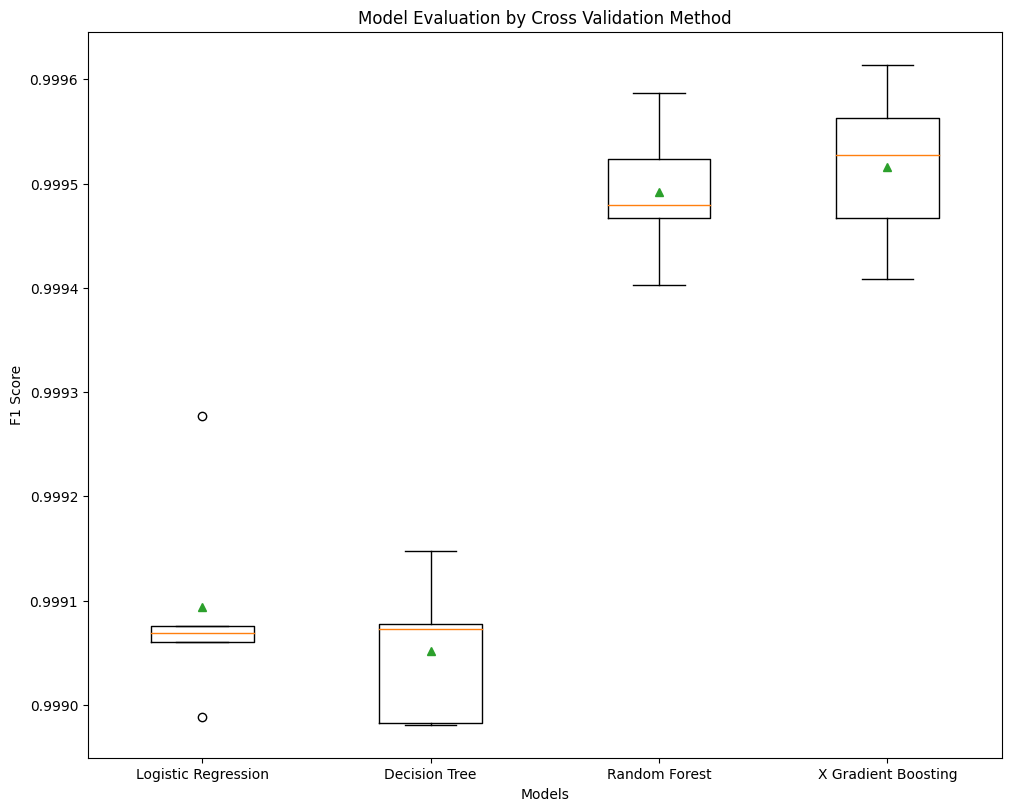

In [ ]:
# Applying Cross Validation Technique - F1 score calculation
lr=LogisticRegression()
dt=DecisionTreeClassifier(random_state=10)
rf=RandomForestClassifier(random_state=10)
xg=XGBClassifier(random_state=10)

result=[]

m=[lr,dt,rf,xg]
model_name=['Logistic Regression','Decision Tree','Random Forest','X Gradient Boosting']

def mdl(model):
  print("\n")
  print(i)

  pipe=Pipeline([('model',model)])
  pipe.fit(x_train,y_train)
  cv=StratifiedKFold(n_splits=5)    # taking 5 folds
  score=cross_val_score(pipe,x_train,y_train,cv=cv,scoring='f1_weighted',n_jobs=-1)
  result.append(score)
  y_pred=cross_val_predict(model,x_train,y_train,cv=cv)
  f1=f1_score(y_train,y_pred)
  print('F1 Score: ',f1)

for i in m:
  mdl(i)

# Visualize the result
plt.figure(figsize=(10,8),layout='constrained')
plt.title('Model Evaluation by Cross Validation Method')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.boxplot(result,labels=model_name,showmeans=True)
plt.show()

- From the above visulas we can say that **XG Boost model** is having highest f1 score among all & also it was approximately normally distributed.
- XGboost model is performing better than others. So we can use this model further.


**-------------------- SMOTE Method --------------------**

In [ ]:
# Resampling the minority class.
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(x,y)
oversampled = pd.concat([pd.DataFrame(oversampled_X), pd.DataFrame(oversampled_Y)], axis=1)

In [ ]:
# Data Spliting for training & testing
x_train,x_test,y_train,y_test=train_test_split(oversampled_X, oversampled_Y, random_state=42)

In [ ]:
# Logistic Regression
def mdl_lr(x_train,x_test,y_train,y_test):
    global acc_trn_lr,acc_lr,f1_lr

    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)

    acc_trn_lr=lr.score(x_train,y_train)
    acc_lr=accuracy_score(y_test,y_pred)
    f1_lr=f1_score(y_test,y_pred)
    conf=confusion_matrix(y_test,y_pred)
    clf=classification_report(y_test,y_pred)

    print("***********Logistic Regression**************")
    print("\n")
    print("Training Accuracy : ",acc_trn_lr)
    print("Testing Accuracy : ",acc_lr)
    print("F1 Score : ",f1_lr)
    print("\n")
    print("Confusion Matrix :\n",conf)
    print("Classification Report :\n",clf)
    print("\n")
    print(15*"=======")

# Decision Tree
def mdl_dt(x_train,x_test,y_train,y_test):
    global acc_trn_dt,acc_dt,f1_dt

    dt=DecisionTreeClassifier(random_state=10)
    dt.fit(x_train,y_train)
    y_pred=dt.predict(x_test)

    acc_trn_dt=dt.score(x_train,y_train)
    acc_dt=accuracy_score(y_test,y_pred)
    f1_dt=f1_score(y_test,y_pred)
    conf=confusion_matrix(y_test,y_pred)
    clf=classification_report(y_test,y_pred)

    print("***********Decision Tree**************")
    print("\n")
    print("Training Accuracy : ",acc_trn_dt)
    print("Testing Accuracy : ",acc_dt)
    print("F1 Score : ",f1_dt)
    print("\n")
    print("Confusion Matrix :\n",conf)
    print("Classification Report :\n",clf)
    print("\n")
    print(15*"=======")

# Random Forest
def mdl_rf(x_train,x_test,y_train,y_test):
    global acc_trn_rf,acc_rf,f1_rf

    rf=RandomForestClassifier(random_state=10)
    rf.fit(x_train,y_train)
    y_pred=rf.predict(x_test)

    acc_trn_rf=rf.score(x_train,y_train)
    acc_rf=accuracy_score(y_test,y_pred)
    f1_rf=f1_score(y_test,y_pred)
    conf=confusion_matrix(y_test,y_pred)
    clf=classification_report(y_test,y_pred)

    print("***********Random Forest**************")
    print("\n")
    print("Training Accuracy : ",acc_trn_rf)
    print("Testing Accuracy : ",acc_rf)
    print("F1 Score : ",f1_rf)
    print("\n")
    print("Confusion Matrix :\n",conf)
    print("Classification Report :\n",clf)
    print("\n")
    print(15*"=======")

# XG Boost
def mdl_xg(x_train,x_test,y_train,y_test):
    global acc_trn_xg,acc_xg,f1_xg

    xg=XGBClassifier(random_state=10)
    xg.fit(x_train,y_train)
    y_pred=xg.predict(x_test)

    acc_trn_xg=xg.score(x_train,y_train)
    acc_xg=accuracy_score(y_test,y_pred)
    f1_xg=f1_score(y_test,y_pred)
    conf=confusion_matrix(y_test,y_pred)
    clf=classification_report(y_test,y_pred)

    print("***********XG Boost**************")
    print("\n")
    print("Training Accuracy : ",acc_trn_xg)
    print("Testing Accuracy : ",acc_xg)
    print("F1 Score : ",f1_xg)
    print("\n")
    print("Confusion Matrix :\n",conf)
    print("Classification Report :\n",clf)
    print("\n")
    print(15*"=======")

In [ ]:
# Model Evaluation
mdl_lr(x_train,x_test,y_train,y_test)
mdl_dt(x_train,x_test,y_train,y_test)
mdl_rf(x_train,x_test,y_train,y_test)
mdl_xg(x_train,x_test,y_train,y_test)

***********Logistic Regression**************


Training Accuracy :  0.9474244499052693
Testing Accuracy :  0.9487893752022397
F1 Score :  0.9474049242862097


Confusion Matrix :
 [[69310  1713]
 [ 5567 65568]]
Classification Report :
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     71023
           1       0.97      0.92      0.95     71135

    accuracy                           0.95    142158
   macro avg       0.95      0.95      0.95    142158
weighted avg       0.95      0.95      0.95    142158



***********Decision Tree**************


Training Accuracy :  1.0
Testing Accuracy :  0.997910775334487
F1 Score :  0.9979144869427221


Confusion Matrix :
 [[70804   219]
 [   78 71057]]
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71023
           1       1.00      1.00      1.00     71135

    accuracy                           1.00    142158
   ma

In [ ]:
# Model Evaluation Tabular Format
tbl=pd.DataFrame()
tbl['Model']=['Logistic Regression','Decision Tree','Random Forest','X Gradient Boosting']
tbl['Training Accuracy']=[acc_trn_lr,acc_trn_dt,acc_trn_rf,acc_trn_xg]
tbl['Testing Accuracy']=[acc_lr,acc_dt,acc_rf,acc_xg]
tbl['F1 Score']=[f1_lr,f1_dt,f1_rf,f1_xg]

tbl.sort_values('F1 Score',ascending=False,ignore_index=True)

,Model,Training Accuracy,Testing Accuracy,F1 Score
0,Random Forest,1.000000,0.999916,0.999916
1,X Gradient Boosting,0.999984,0.999669,0.999670
2,Decision Tree,1.000000,0.997911,0.997914
3,Logistic Regression,0.947424,0.948789,0.947405


- According to the above evaluation we can say that Random Forest is the best model if we compare their f1 scores.
- But as I used SMOTE method so some of data is manipulated in order to resample the data. So If the data is sensitive enough, then we cannnot use this method. On that case we have to go by Cross Validation Method & have to use XGBoost model for good result.
- If the data is not sensitive then we can use this method & Random Forest model for better result.